# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

# set this so the graphs open internally
# %matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [2]:
chip=pd.read_csv("chipotle.tsv", sep='\t')

### Step 4. See the first 10 entries

In [3]:
chip.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

In [7]:
x=chip.groupby('item_name').quantity.sum().sort_values(ascending=False).head(5).reset_index()
x

,item_name,quantity
0,Chicken Bowl,761
1,Chicken Burrito,591
2,Chips and Guacamole,506
3,Steak Burrito,386
4,Canned Soft Drink,351


([<matplotlib.axis.XTick at 0x140d8dbd0>,
 [Text(0, 0, 'Chicken Bowl'),
  Text(1, 0, 'Chicken Burrito'),
  Text(2, 0, 'Chips and Guacamole'),
  Text(3, 0, 'Steak Burrito'),
  Text(4, 0, 'Canned Soft Drink')])

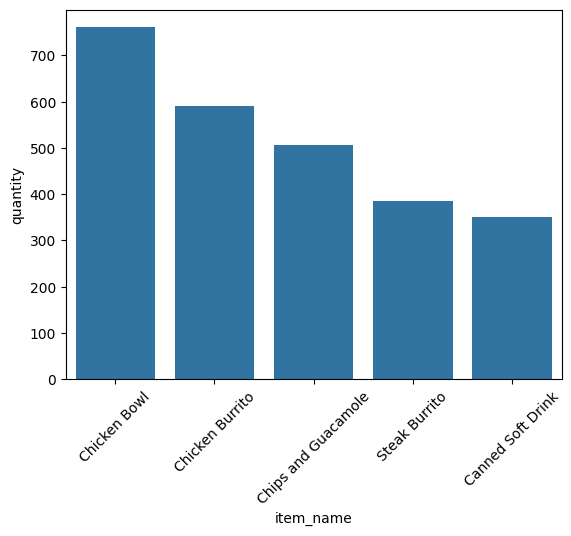

In [ ]:
sns.barplot(data=x, x='item_name', y='quantity')
plt.xticks(rotation=45)

In [14]:
y=chip.groupby('item_name').quantity.sum().sort_values(ascending=False).head(5)
y

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Canned Soft Drink      351
Name: quantity, dtype: int64

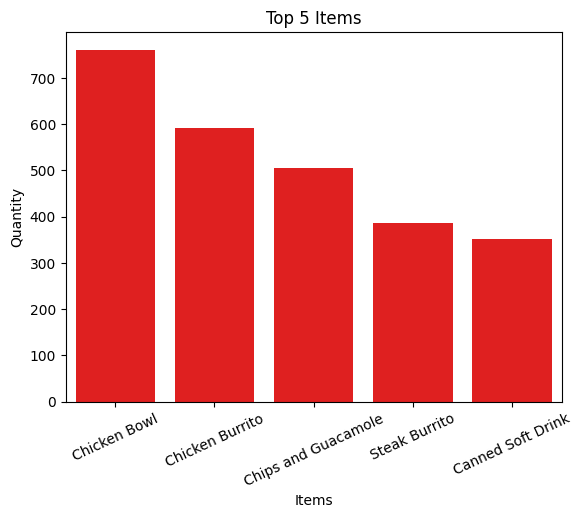

In [22]:
sns.barplot(x=y.index, y=y, color='r')
plt.xlabel('Items')
plt.xticks(rotation=25)
plt.ylabel('Quantity')
plt.title('Top 5 Items')
plt.show()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [26]:
chip.item_price = chip.item_price.apply(lambda x: float(x[1:]))
chip.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


<Axes: xlabel='item_price', ylabel='quantity'>

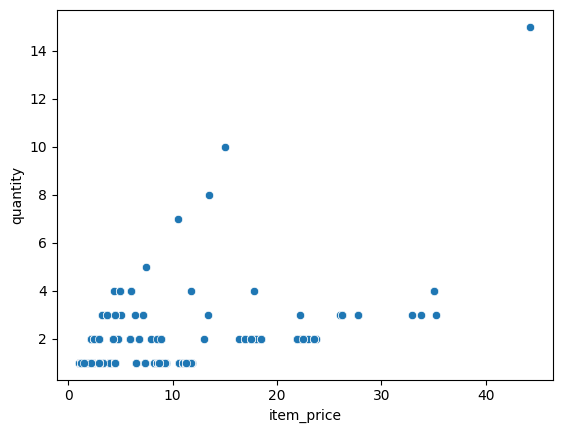

In [27]:
sns.scatterplot(data=chip,x='item_price', y='quantity')

In [29]:
# but we should have grouped by orderid and summed the prices and quantity

new = chip.groupby('order_id')[['quantity','item_price']].sum()
new

,quantity,item_price
order_id,,
1,4,11.56
2,2,16.98
3,2,12.67
4,2,21.00
5,2,13.70
...,...,...
1830,2,23.00
1831,3,12.90
1832,2,13.20


In [30]:
chip.groupby('order_id').sum()


,quantity,item_name,choice_description,item_price
order_id,,,,
1,4,Chips and Fresh Tomato SalsaIzzeNantucket Nect...,[Clementine][Apple],11.56
2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
3,2,Chicken BowlSide of Chips,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",12.67
4,2,Steak BurritoSteak Soft Tacos,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",21.00
5,2,Steak BurritoChips and Guacamole,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",13.70
...,...,...,...,...
1830,2,Steak BurritoVeggie Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",23.00
1831,3,Carnitas BowlChipsBottled Water,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",12.90
1832,2,Chicken Soft TacosChips and Guacamole,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]",13.20


<Axes: xlabel='item_price', ylabel='quantity'>

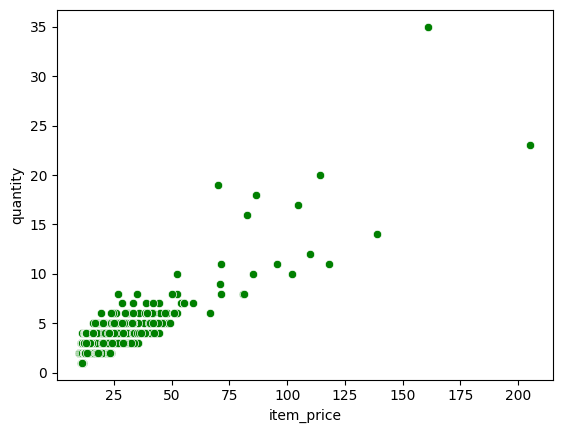

In [38]:
sns.scatterplot(data=new, x='item_price', y='quantity', color='green')

### Step 7. BONUS: Create a question and a graph to answer your own question.

In [40]:
chip.drop(columns='choice_description', inplace=True)
chip

,order_id,quantity,item_name,item_price
0,1,1,Chips and Fresh Tomato Salsa,2.39
1,1,1,Izze,3.39
2,1,1,Nantucket Nectar,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,2.39
4,2,2,Chicken Bowl,16.98
...,...,...,...,...
4617,1833,1,Steak Burrito,11.75
4618,1833,1,Steak Burrito,11.75
4619,1834,1,Chicken Salad Bowl,11.25
4620,1834,1,Chicken Salad Bowl,8.75


In [54]:
orders = chip.groupby('order_id').agg({'quantity': ['min', 'max', 'sum'],'item_price': ['max', 'sum']})
orders

quantity         item_price       
              min max sum        max    sum
order_id                                   
1               1   1   4       3.39  11.56
2               2   2   2      16.98  16.98
3               1   1   2      10.98  12.67
4               1   1   2      11.75  21.00
5               1   1   2       9.25  13.70
...           ...  ..  ..        ...    ...
1830            1   1   2      11.75  23.00
1831            1   1   3       9.25  12.90
1832            1   1   2       8.75  13.20
1833            1   1   2      11.75  23.50
1834            1   1   3      11.25  28.75

[1834 rows x 5 columns]

In [55]:
orders.corr()

quantity                     item_price          
                     min       max       sum        max       sum
quantity   min  1.000000  0.350243 -0.045402   0.680450  0.045449
           max  0.350243  1.000000  0.649588   0.537972  0.424422
           sum -0.045402  0.649588  1.000000   0.237737  0.831859
item_price max  0.680450  0.537972  0.237737   1.000000  0.371771
           sum  0.045449  0.424422  0.831859   0.371771  1.000000

<Axes: xlabel='None-None', ylabel='order_id'>

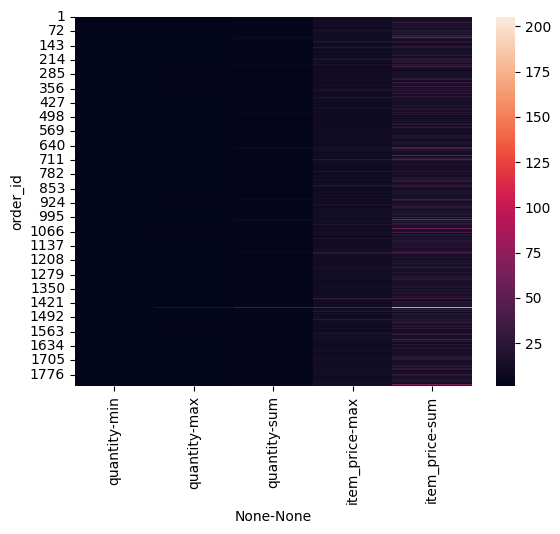

In [56]:
sns.heatmap(data=orders)